# Types/Tokens/TTR

      

In [2]:
import csv
text2=[]
with open("C:\\Users\\Aditi Sethia\\Downloads\\tweets.csv", "r",encoding="utf8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        text2.append(row['Sentence'])        
#print(text2)  

In [3]:
import re,string
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize
def remove_links(text):
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    link_free_text=text
    return(link_free_text)
    

def remove_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return(' '.join(words))

    
list1=[]
for t in text2:
    list1.append(remove_all_entities(remove_links(t)))
    
#print(list)
    
    

    

In [4]:
text=''
text = text.join(list1)
text = text.lower()
text[0:40]




'nahi nahi mere saath jaakar pachtaogi ye'

In [5]:
import nltk

tokens=nltk.word_tokenize(text)
print("Number of tokens:", len(tokens))
print("Number of types:",len(set(tokens)))
print("Types to token ratio(TTR):",len(set(tokens))/len(tokens))

Number of tokens: 277158
Number of types: 48979
Types to token ratio(TTR): 0.17671869475173005


## Zipf's Law: Word frequency * Work Rank = Constant

In [6]:
import matplotlib.pyplot as plt
from scipy import special
import numpy as np




In [7]:
from operator import itemgetter  

freq=[]
words=[]
frequency = {}


for word in tokens:
    count = frequency.get(word,0)
    frequency[word] = count + 1
    
        
Rank={}
x=1
for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    Rank[key]=x
    x=x+1    
    freq.append(value)

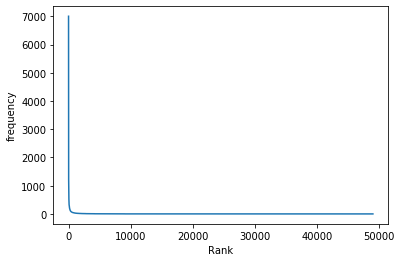

In [8]:
plt.plot(freq)
plt.ylabel('frequency')
plt.xlabel('Rank')
plt.show()

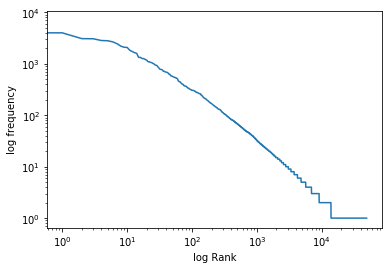

In [41]:
plt.loglog(freq)
plt.ylabel('log frequency')
plt.xlabel('log Rank')
plt.show()

## Zipf law for length

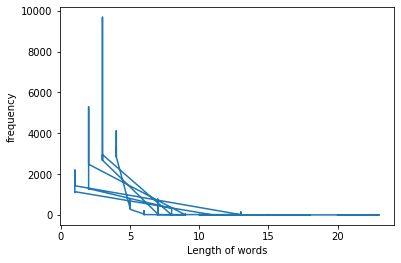

In [42]:
import time
A= []
for i in frequency.keys():
    A.append(len(i))
      
B= []
for i in frequency.values():
    B.append(i) 
    
N=[]
T=[]
f=0
for i in range(len(A)-30000):
    for j in range(i+1,len(A)-30000):
        if A[i]==A[j] and A[j]!=0:
            f=1
            sum= B[i]+B[j]
            T.append(sum)
            N.append(A[i])
            A[j]=0                
        if f==0:
            T.append(B[i])
            N.append(A[i])            
                       
plt.plot(N,T)
plt.ylabel('frequency')
plt.xlabel('Length of words')
plt.show()      
                

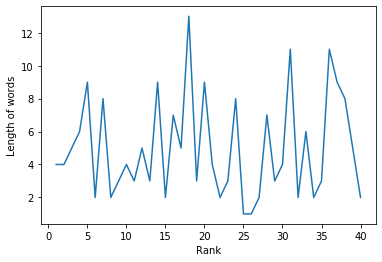

In [28]:
D=[]
for i in Rank.values():
    D.append(i)
plt.plot(D[0:40],A[0:40])
plt.xlabel('Rank')
plt.ylabel('Length of words')
lplt.show() 

## Heaps Law  :  Vocab size is proportional to Corpus size

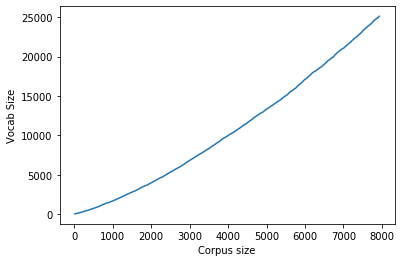

In [11]:
l1=[]
l2=[]
l3=""



t=''
for i in range(0,2000):
    l3 = l3 +  " " + list1[i]
    tokens = nltk.word_tokenize(l3)
    l2.append(len(tokens))
    l1.append(len(set(tokens)))

plt.plot(l1,l2) 
plt.xlabel('Corpus size')
plt.ylabel('Vocab Size')
plt.show()
        
    
    